# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

## Modern Portfolio Theory
In this notebook, you will practice the concepts learned in the previous video of Modern Portfolio Theory. The steps involved are:

1. Import the data
2. Portfolio returns/portfolio standard deviation
5. Change the stocks
6. Change the values of a and b
7. Efficient frontier
8. Optimal weights

### Import the libraries

In [1]:
# Importing the necessary Python modules required in this notebook 
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

### Import the data
We have imported and saved the prices of the stocks, Chevron (CVX), Microsoft (MSFT) and Google (GOOGL) in a CSV file. You will read the CSV file and save in a dataframe. To do this, you will be using pandas `read_csv()` method.

In [2]:
# Read CSV to get the prices
stock_prices = pd.read_csv(
    '../data_modules/Stock_Prices_2016_To_2017_MPT.csv', index_col=0)

stock_prices.tail()

,CVX,GOOGL,MSFT
Date,,,
22-12-2017,124.98,1068.859985,85.51
26-12-2017,125.98,1065.849976,85.40
27-12-2017,125.55,1060.199951,85.71
28-12-2017,125.58,1055.949951,85.72
29-12-2017,125.19,1053.400024,85.54


### Portfolio returns/portfolio standard deviation - you already know this!

First let us calculate the annualised returns and annualised standard deviation of the stocks. You learned the calculation in the previous IPython notebook.

In [3]:
# Calculate annualised returns
annual_returns = ((((stock_prices.iloc[-1]-stock_prices.iloc[0]) /
                    stock_prices.iloc[0])+1)**(252/len(stock_prices)) - 1)

# Calculate the daily returns
daily_returns = stock_prices.pct_change()

# Drop the rows with NaN values
daily_returns.dropna(inplace=True)

# Calculate the standard deviation of the stocks and annualise it by multiplying with sqrt(252)
annual_std_dev = daily_returns.std()*math.sqrt(252)

Calculate the returns and standard deviation of the portfolio with Microsoft (MSFT) and Google (GOOGL).

In [4]:
# Assume equal weights
a = 0.5
b = 0.5

# Calculate portfolio returns
portfolio_returns = a*annual_returns['MSFT'] + b*annual_returns['GOOGL']

# Calculate the covariance of the stocks and annualise it by multiplying with 252
cov_msft_googl = np.cov(
    daily_returns['MSFT'], daily_returns['GOOGL'], bias=True)*252

# Calculate portfolio standard deviation
portfolio_std_dev = math.sqrt((a**2)*(annual_std_dev['MSFT']**2) + (b**2)*(annual_std_dev['GOOGL']**2)
                              + 2*a*b*cov_msft_googl[0, 1])

We have learned in the previous video that Modern Portfolio Theory maximizes the ratio of portfolio returns/portfolio standard deviation. Let us calculate the ratio for the portfolio you have created with Microsoft (MSFT) and Google (GOOGL).

In [5]:
print("The (Portfolio returns/portfolio standard deviation) is: ",
      round(portfolio_returns/portfolio_std_dev, 2))

The (Portfolio returns/portfolio standard deviation) is:  1.27


### Change the stocks

The first case to improve the ratio is by choosing stocks that have less covariance. Calculate the covariance between CVX and MSFT.

In [6]:
# Print the covariance value of MSFT and GOOGL
print("The covariance of MSFT and GOOGL is: ", cov_msft_googl[0, 1])

# Calculate the covariance between CVX and MSFT and annualise it by multiplying with 252
cov_msft_cvx = np.cov(daily_returns['CVX'],
                      daily_returns['MSFT'], bias=True)*252

# Print the covariance value of MSFT and CVX
print("The covariance of MSFT and CVX is: ", cov_msft_cvx[0, 1])

The covariance of MSFT and GOOGL is:  0.022831919907907727
The covariance of MSFT and CVX is:  0.009435350672403356


In the above step, you can see that the covariance value is less than the covariance between GOOGL and MSFT.

Calculate the portfolio returns and portfolio standard deviation of MSFT and CVX. Calculate portfolio returns/portfolio standard deviation.

In [7]:
# Calculate portfolio returns by multiplying the annualised returns with their weights
portfolio_returns = a*annual_returns['CVX'] + b*annual_returns['MSFT']
print("The Portfolio returns are: ", str(round(portfolio_returns, 4)*100)+"%")

# Calculate portfolio standard deviation using the annualised standard deviation and the covariance of the stocks
portfolio_std_dev = math.sqrt((a**2)*(annual_std_dev['CVX']**2) + (
    b**2)*(annual_std_dev['MSFT']**2) + 2*a*b*cov_msft_cvx[0, 1])

print("The Portfolio standard deviation is: ",
      str(round(portfolio_std_dev*100, 2))+"%")

print("The (Portfolio returns/portfolio standard deviation) is: ",
      round(portfolio_returns/portfolio_std_dev, 2))

The Portfolio returns are:  21.87%
The Portfolio standard deviation is:  15.32%
The (Portfolio returns/portfolio standard deviation) is:  1.43


You can see that the value of portfolio returns/portfolio standard deviation has increased.

### Change the weights

The other way to improve the ratio is by changing the percentage capital allocations of the portfolio with Chevron (CVX) and Microsoft (MSFT). 

Let's generate 500 portfolios with different percentage allocations. You will calculate portfolio returns and portfolio standard deviation for all the portfolios and save it into a dataframe. You will save the portfolio returns/portfolio standard deviation along with the weights, that is a and b values

In [8]:
# Create an empty dataframe
portfolio = pd.DataFrame()

# Initialize the number of portfolios
num_of_portfolios = 500

# Run the loop for each portfolio
for i in range(num_of_portfolios):
    # Generate a and b values randomly by using numpy random function.
    # The argument '1' ensures the values generated are between 0 and 1
    a = np.random.random(1)[0]
    b = 1-a
    portfolio.loc[i, 'cvx_weight'] = a
    portfolio.loc[i, 'msft_weight'] = b

    # Save the portfolio returns and portfolio standard deviation values along with its ratio
    portfolio.loc[i, 'returns'] = a * \
        annual_returns['CVX'] + b*annual_returns['MSFT']

    portfolio.loc[i, 'std_dev'] = math.sqrt((a**2)*(annual_std_dev['CVX']**2) +
                                            (b**2)*(annual_std_dev['MSFT']**2)
                                            + 2*a*b*cov_msft_cvx[0, 1])

    portfolio.loc[i, 'returns/std_dev'] = portfolio.loc[i, 'returns'] / \
        portfolio.loc[i, 'std_dev']

### Identify the portfolios with maximum returns/risk and minimum risk

Let's identify the portfolio with maximum returns/standard deviation. We will also identify the portfolio with minimum standard deviation.

In [9]:
# Identify the portfolio with maximum returns/standard deviation using idxmax() function
max_ret_by_std_dev = portfolio.iloc[portfolio['returns/std_dev'].idxmax()]

# Similarly identify the portfolio with minimum standard deviation
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]

### Efficient frontier

We will plot all the 500 portfolios in a graph with portfolio standard deviation on the X-axis and portfolio returns on the Y-axis. The curve generated is known as the <b>Efficient Frontier</b>

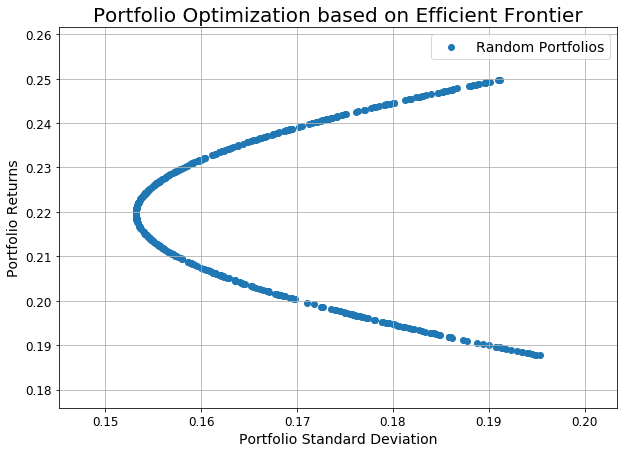

In [10]:
# Plot the portfolios
plt.figure(figsize=(10, 7))
plt.grid()
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.legend(loc='best', fontsize=14)
plt.show()

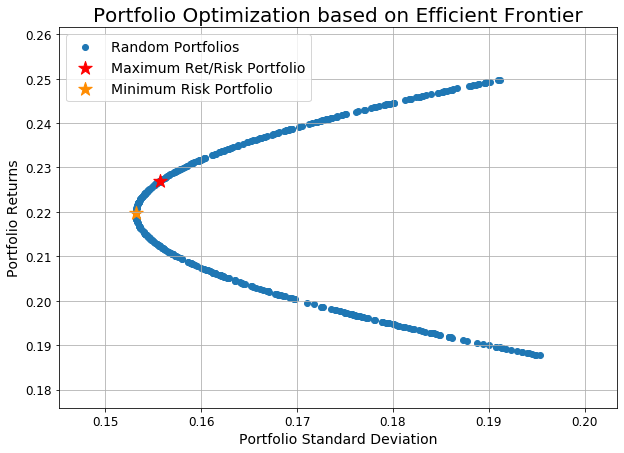

In [11]:
# Highlight the maximum returns/risk portfolio and minimum risk portfolio
plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.scatter(max_ret_by_std_dev.std_dev, max_ret_by_std_dev.returns,
            marker='*', s=200, color='r', label='Maximum Ret/Risk Portfolio')
plt.scatter(min_std_dev.std_dev, min_std_dev.returns,
            marker='*', s=200, color='darkorange', label='Minimum Risk Portfolio')
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=14)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.show()

### Obtain the optimal weights

You have saved the weights also while creating the portfolios. You can get the optimal weights of the portfolio with maximum returns/standard deviation value.

In [12]:
# Use iloc on the row to obtain the optimal weights
optimal_weights = max_ret_by_std_dev[["cvx_weight", "msft_weight"]]

# Print the optimal weights of MSFT and CVX
print("The optimal weight of MSFT is: ", str(
    round(optimal_weights[0]*100, 2))+"%")

print("The optimal weight of CVX is: ", str(
    round(optimal_weights[1]*100, 2))+"%")

The optimal weight of MSFT is:  36.61%
The optimal weight of CVX is:  63.39%


In the next section, you will learn how to extend these concepts to a portfolio with multiple stocks.<br><br>